In [1]:
#Import pandas for data frames, pathlib for importing .txt file, and matplotlib for datavisualization

import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from matplotlib import cm
#from statsmodels.graphics.mosaicplot import mosaic

In [2]:
#Download awardee data from https://www.research.gov/grfp/AwardeeList.do?method=loadAwardeeList
#Download honorable mention data from https://www.research.gov/grfp/AwardeeList.do;jsessionid=CDA6FF7B63FDEC797A2BF02377E32469
#Click the Excel file link towards the bottom of the page
##Make sure to save file as Utf-8 encoding

In [3]:
%pwd

'C:\\Users\\andyp\\biof309\\final-project'

In [4]:
cd 

C:\Users\andyp


In [5]:
#Set p as pathlib.Path.home() to set path for importing data
p = pathlib.Path.home()

#Set path for final project
p / "biof309" / 'final-project'

#Check to see if path exists
p.exists()

True

In [6]:
#Set path for Awarded text file
GRFP1 = p / "biof309" / 'final-project'/"GRFP1.txt"
#Set df1 as a pandas dataframe from .txt file, read using read_csv with sep="\t" as deliminator
df1 = pd.read_csv(GRFP1, sep="\t")
#View head of dataframe
df1.head()

,Name,Baccalaureate Institution,Field of Study,Current Institution
0,"Abbott, Kathleen Emma","UNIVERSITY OF CALIFORNIA, BERKELEY",Geosciences - Physical Oceanography,NaN
1,"Abele, Taylor Jane",University of North Carolina at Chapel Hill,Life Sciences - Cell Biology,University of North Carolina at Chapel Hill
2,"Abrams, Samantha Rose",Skidmore College,Psychology - Social Psychology,NaN
3,"Abramson, Haley Gilbert",Massachusetts Institute of Technology,Engineering - Biomedical Engineering,JOHNS HOPKINS UNIVERSITY
4,"Abreha, Biruk Gezahegn",Northeastern University,"Chemistry - Chemical Theory, Models and Comput...",Northeastern University


In [7]:
#Set path for Honorable Mention text file
GRFP2 = p / "biof309" / 'final-project' / "GRFP2.txt"
#Set df2 as a pandas dataframe from .txt file, read using read_csv with sep="\t" as deliminator
df2 = pd.read_csv(GRFP2, sep="\t")
#View head of dataframe
df2.head()

,Name,Baccalaureate Institution,Field of Study,Current Institution
0,"Abe, Mahiro",Cornell University,Physics and Astronomy - Astronomy and Astrophy...,Cornell University
1,"Abellera, Cierra Maya",Boise State University,Psychology - Social Psychology,UNIVERSITY OF MASSACHUSETTS AMHERST
2,"Abraham, Evelyn Jane",Winthrop University,Life Sciences - other (specify) - Plant Biology,Pennsylvania State Univ University Park
3,"Abushawish, Marwan Abdallah","UNIVERSITY OF CALIFORNIA, BERKELEY",Life Sciences - other (specify) - Immunology,NaN
4,"Acevedo-Sanchez, Yamilex",University of Puerto Rico Mayaguez,Life Sciences - Cell Biology,Massachusetts Institute of Technology


In [8]:
#Add column for award status for either Awarded or Honorable Mention

df1['Award Status'] = 'Awarded'
df2['Award Status'] = 'Honorable Mention'

In [9]:
#View new head of data to see new column and values
df1.head()

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status
0,"Abbott, Kathleen Emma","UNIVERSITY OF CALIFORNIA, BERKELEY",Geosciences - Physical Oceanography,NaN,Awarded
1,"Abele, Taylor Jane",University of North Carolina at Chapel Hill,Life Sciences - Cell Biology,University of North Carolina at Chapel Hill,Awarded
2,"Abrams, Samantha Rose",Skidmore College,Psychology - Social Psychology,NaN,Awarded
3,"Abramson, Haley Gilbert",Massachusetts Institute of Technology,Engineering - Biomedical Engineering,JOHNS HOPKINS UNIVERSITY,Awarded
4,"Abreha, Biruk Gezahegn",Northeastern University,"Chemistry - Chemical Theory, Models and Comput...",Northeastern University,Awarded


In [10]:
#View new head of data to see new column and values
df2.head()

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status
0,"Abe, Mahiro",Cornell University,Physics and Astronomy - Astronomy and Astrophy...,Cornell University,Honorable Mention
1,"Abellera, Cierra Maya",Boise State University,Psychology - Social Psychology,UNIVERSITY OF MASSACHUSETTS AMHERST,Honorable Mention
2,"Abraham, Evelyn Jane",Winthrop University,Life Sciences - other (specify) - Plant Biology,Pennsylvania State Univ University Park,Honorable Mention
3,"Abushawish, Marwan Abdallah","UNIVERSITY OF CALIFORNIA, BERKELEY",Life Sciences - other (specify) - Immunology,NaN,Honorable Mention
4,"Acevedo-Sanchez, Yamilex",University of Puerto Rico Mayaguez,Life Sciences - Cell Biology,Massachusetts Institute of Technology,Honorable Mention


In [11]:
#Concatenat both data frames
result = pd.concat([df1,df2])

#Sort values by alphabetical order by name
df= result.sort_values('Name', ascending=True)

#View head of new dataframe
df.head()

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status
0,"Abbott, Kathleen Emma","UNIVERSITY OF CALIFORNIA, BERKELEY",Geosciences - Physical Oceanography,NaN,Awarded
0,"Abe, Mahiro",Cornell University,Physics and Astronomy - Astronomy and Astrophy...,Cornell University,Honorable Mention
1,"Abele, Taylor Jane",University of North Carolina at Chapel Hill,Life Sciences - Cell Biology,University of North Carolina at Chapel Hill,Awarded
1,"Abellera, Cierra Maya",Boise State University,Psychology - Social Psychology,UNIVERSITY OF MASSACHUSETTS AMHERST,Honorable Mention
2,"Abraham, Evelyn Jane",Winthrop University,Life Sciences - other (specify) - Plant Biology,Pennsylvania State Univ University Park,Honorable Mention


In [12]:
#column_values = df[["Baccalaureate Institution", "Current Institution"]].values.ravel()
BI = np.unique(df['Baccalaureate Institution'])
print(BI)
#len(BI)

['AMERICAN UNIVERSITY' 'Abilene Christian University' 'Adelphi University'
 'Adrian College' 'Agnes Scott College' 'Alabama A&M University'
 'Albany State University' 'Albion College' 'Alfred University'
 'American University' 'Amherst College' 'Angelo State University'
 'Appalachian State University' 'Aquinas College'
 'Arizona State University' 'Arkansas State University Main Campus'
 'Assumption College' 'Auburn University' 'Augsburg College'
 'Augustana College' 'Azusa Pacific University' 'BRANDEIS UNIVERSITY'
 'BRIDGEWATER STATE UNIVERSITY' 'BRYN MAWR COLLEGE'
 'Bahiana School of Medicine and Public Health' 'Ball State University'
 'Bard College' 'Barnard College' 'Barry University' 'Bates College'
 'Baylor University' 'Beloit College' 'Bemidji State University'
 'Ben Gurion University Of The Negev' 'Benedictine College'
 'Bennington College' 'Berry College' 'Bethel College' 'Bethel University'
 'Bezalel Academy of Art and Design' 'Binghamton University'
 'Biola University' 'Birla

In [13]:
df['Baccalaureate Institution'] = df['Baccalaureate Institution'].astype('str')
df.dtypes

Name                         object
Baccalaureate Institution    object
Field of Study               object
Current Institution          object
Award Status                 object
dtype: object

In [14]:
def changename(df, old_names, new_name): 
    return df.replace(old_names, new_name, regex=True)

In [20]:
changename(df, "AMERICAN UNIVERSITY", "American Univeristy")
changename(df, "UNIVERSITY OF CALIFORNIA, BERKELEY", "University of California, Berkeley")
changename(df, "", "")
changename(df, "", "")
changename(df, "", "")
changename(df, "", "")

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status
0,"Abbott, Kathleen Emma","UNIVERSITY OF CALIFORNIA, BERKELEY",Geosciences - Physical Oceanography,NaN,Awarded
0,"Abe, Mahiro",Cornell University,Physics and Astronomy - Astronomy and Astrophy...,Cornell University,Honorable Mention
1,"Abele, Taylor Jane",University of North Carolina at Chapel Hill,Life Sciences - Cell Biology,University of North Carolina at Chapel Hill,Awarded
1,"Abellera, Cierra Maya",Boise State University,Psychology - Social Psychology,UNIVERSITY OF MASSACHUSETTS AMHERST,Honorable Mention
2,"Abraham, Evelyn Jane",Winthrop University,Life Sciences - other (specify) - Plant Biology,Pennsylvania State Univ University Park,Honorable Mention
...,...,...,...,...,...
1603,"van Geen, Camilla",Columbia University,Psychology - Cognitive Neuroscience,NaN,Honorable Mention
1605,"van Geldern, Sean",UNIVERSITY OF ILLINOIS,Physics and Astronomy - Condensed Matter Physics,University of Massachusetts Amherst,Honorable Mention
1607,"van Zee, Erynne",Tufts University,Social Sciences - Urban and Regional Planning,UNIVERSITY OF WASHINGTON,Honorable Mention
1882,"von Hafften, Alexander H",Lewis and Clark College,Social Sciences - Economics,NaN,Awarded


In [13]:
#df.loc[df['Baccalaureate Institution'].str.lower().str.contains('berkeley', case=False), 'Baccalaureate Institution'] = 'University of California, Berkeley'
#df.loc[df['Baccalaureate Institution'].str.lower().str.contains('American University', case=False), 'Baccalaureate Institution'] = 'American University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Brandeis University', case=False), 'Baccalaureate Institution'] = 'Brandeis University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Bridgewater State University', case=False), 'Baccalaureate Institution'] = 'Bridgewater State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Brigham Young University', case=False), 'Baccalaureate Institution'] = 'Brigham Young University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Bryn Mawr College', case=False), 'Baccalaureate Institution'] = 'Bryn Mawr College'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('California State University', case=False), 'Baccalaureate Institution'] = 'California State University System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('CUNY', case=False), 'Baccalaureate Institution'] = 'City University of New York System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('City University of New York', case=False), 'Baccalaureate Institution'] = 'City University of New York System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('California Polytechnic State University', case=False), 'Baccalaureate Institution'] = 'California Polytechnic State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Cal Poly Pomona Foundation, Inc.', case=False), 'Baccalaureate Institution'] = 'California Polytechnic State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Carnegie', case=False), 'Baccalaureate Institution'] = 'Carnegie Mellon University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Drexel University', case=False), 'Baccalaureate Institution'] = 'Drexel University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Eastern Michigan University', case=False), 'Baccalaureate Institution'] = 'Eastern Michigan University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('George Washington University', case=False), 'Baccalaureate Institution'] = 'George Washington University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Harvard', case=False), 'Baccalaureate Institution'] = 'Harvard University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Humboldt State University', case=False), 'Baccalaureate Institution'] = 'Humboldt State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Indian Institute of Technology', case=False), 'Baccalaureate Institution'] = 'Indian Institute of Technology'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Indiana University', case=False), 'Baccalaureate Institution'] = 'Indiana University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('American Puerto Rico', case=False), 'Baccalaureate Institution'] = 'University of Puerto Rico'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Johns Hopkins University', case=False), 'Baccalaureate Institution'] = 'Johns Hopkins University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Louisiana State University', case=False), 'Baccalaureate Institution'] = 'Louisiana State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Marquette University', case=False), 'Baccalaureate Institution'] = 'Marquette University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Miami University', case=False), 'Baccalaureate Institution'] = 'Miami University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('New Mexico State University', case=False), 'Baccalaureate Institution'] = 'New Mexico State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('New York University', case=False), 'Baccalaureate Institution'] = 'New York University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Ohio State University', case=False), 'Baccalaureate Institution'] = 'Ohio State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Pennsylvania State', case=False), 'Baccalaureate Institution'] = 'Pennsylvania State University System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Rutgers', case=False), 'Baccalaureate Institution'] = 'Rutgers University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('San Diego State University', case=False), 'Baccalaureate Institution'] = 'San Diego State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Stony Brook University', case=False), 'Baccalaureate Institution'] = 'Stony Brook University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('SUNY', case=False), 'Baccalaureate Institution'] = 'State University of New York System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains("Mary's College", case=False), 'Baccalaureate Institution'] = 'St Marys College of Maryland'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Sterling College', case=False), 'Baccalaureate Institution'] = 'Sterling College'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Texas A&M University', case=False), 'Baccalaureate Institution'] = 'Texas A&M University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Universidade de Sao Paulo', case=False), 'Baccalaureate Institution'] = 'Universidade de Sao Paulo'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Kansas', case=False), 'Baccalaureate Institution'] = 'University of Kansas'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of St Andrews', case=False), 'Baccalaureate Institution'] = 'University of St Andrews'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Alabama', case=False), 'Baccalaureate Institution'] = 'University of Alabama'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Alaska', case=False), 'Baccalaureate Institution'] = 'University of Alaska'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Arizona', case=False), 'Baccalaureate Institution'] = 'University of Arizona'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California Merced', case=False), 'Baccalaureate Institution'] = 'University of California, Merced'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California Davis', case=False), 'Baccalaureate Institution'] = 'University of California, Davis'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California-Davis', case=False), 'Baccalaureate Institution'] = 'University of California, Davis'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California Irvine', case=False), 'Baccalaureate Institution'] = 'University of California, Irvine'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California Los Angeles', case=False), 'Baccalaureate Institution'] = 'University of California, Los Angeles'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California Riverside', case=False), 'Baccalaureate Institution'] = 'University of California, Riverside'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California San Diego', case=False), 'Baccalaureate Institution'] = 'University of California, San Diego'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California Santa Bardara', case=False), 'Baccalaureate Institution'] = 'University of California, Santa Bardara'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California Santa Cruz', case=False), 'Baccalaureate Institution'] = 'University of California, Santa Cruz'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Cincinnati', case=False), 'Baccalaureate Institution'] = 'University of Cincinnati'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Colorado', case=False), 'Baccalaureate Institution'] = 'University of Colorado System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Hawaii', case=False), 'Baccalaureate Institution'] = 'University of Hawaii System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Illinois', case=False), 'Baccalaureate Institution'] = 'University of Illinois System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Iowa', case=False), 'Baccalaureate Institution'] = 'University of Iowa'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Kentucky', case=False), 'Baccalaureate Institution'] = 'University of Kentucky'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Maryland', case=False), 'Baccalaureate Institution'] = 'University of Maryland System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Massachusetts', case=False), 'Baccalaureate Institution'] = 'University of Massachusetts System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Michigan', case=False), 'Baccalaureate Institution'] = 'University of Michigan'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Minnesota', case=False), 'Baccalaureate Institution'] = 'University of Minnesota'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Missouri', case=False), 'Baccalaureate Institution'] = 'University of Missouri'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Nebraska', case=False), 'Baccalaureate Institution'] = 'University of Nebraska'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Nevada', case=False), 'Baccalaureate Institution'] = 'University of Nevada System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('NSHE', case=False), 'Baccalaureate Institution'] = 'University of Nevada System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of North Carolina', case=False), 'Baccalaureate Institution'] = 'University of North Carolina System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Northwestern - St. Paul', case=False), 'Baccalaureate Institution'] = 'University of Northwestern, St Paul'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Notre Dame', case=False), 'Baccalaureate Institution'] = 'University of Notre Dame'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Puerto Rico', case=False), 'Baccalaureate Institution'] = 'University of Puerto Rico'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of South Carolina', case=False), 'Baccalaureate Institution'] = 'University of South Carolina System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of South Dakota', case=False), 'Baccalaureate Institution'] = 'University of South Dakota'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Tennessee', case=False), 'Baccalaureate Institution'] = 'University of Tennessee System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Texas', case=False), 'Baccalaureate Institution'] = 'University of Texas System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Washington', case=False), 'Baccalaureate Institution'] = 'University of Washington'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of Wisconsin', case=False), 'Baccalaureate Institution'] = 'University of Wisconsin System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('VIRGINIA POLYTECH INST AND STATE UNVIRGINIA POLYTECH INST AND STATE UN', case=False), 'Baccalaureate Institution'] = 'Virginia Polytechnic Institute and State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Washington State University - Vancouver', case=False), 'Baccalaureate Institution'] = 'Washington State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Washington University in St. Louis', case=False), 'Baccalaureate Institution'] = 'Washington University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California-Santa Barbara', case=False), 'Baccalaureate Institution'] = 'University of California, Santa Barbara'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California-Los Angeles', case=False), 'Baccalaureate Institution'] = 'University of California, Los Angeles'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California-Santa Cruz', case=False), 'Baccalaureate Institution'] = 'University of California, Santa Cruz'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California-Irvine', case=False), 'Baccalaureate Institution'] = 'University of California, Irvine'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('UNIVERSITY OF VIRGINIA', case=False), 'Baccalaureate Institution'] = 'University of Virginia'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Trustees of Boston University', case=False), 'Baccalaureate Institution'] = 'Boston University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Arkansas State University Main Campus', case=False), 'Baccalaureate Institution'] = 'Arkansas State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('California State Polytechnic University-Pomona', case=False), 'Baccalaureate Institution'] = 'California Polytechnic State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('California State Uiversity, Sacramento', case=False), 'Baccalaureate Institution'] = 'California State University System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('CORNELL UNIVERSITY', case=False), 'Baccalaureate Institution'] = 'Cornell University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Geogia Institute of Technology', case=False), 'Baccalaureate Institution'] = 'Georgia Institute of Technology'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('State University of New York College at Oneonta', case=False), 'Baccalaureate Institution'] = 'State University of New York System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Liberty University, Inc.', case=False), 'Baccalaureate Institution'] = 'Lincoln University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('UNIVERSITY AT ALBANY', case=False), 'Baccalaureate Institution'] = 'State University of New York System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California - Merced', case=False), 'Baccalaureate Institution'] = 'University of California, Merced'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California-San Diego', case=False), 'Baccalaureate Institution'] = 'University of California, San Diego'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('University of California-Riverside', case=False), 'Baccalaureate Institution'] = 'University of California, Riverside'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Colorado Seminary dba University of Denver', case=False), 'Baccalaureate Institution'] = 'University of Denver'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('UNIVERSITY OF MIAMI', case=False), 'Baccalaureate Institution'] = 'University of Miami'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('Nevada System of Higher Education', case=False), 'Baccalaureate Institution'] = 'University of Nevada System'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('VIRGINIA POLYTECH INST AND STATE UN', case=False), 'Baccalaureate Institution'] = 'Virginia Polytechnic Institute and State University'
df.loc[df['Baccalaureate Institution'].str.lower().str.contains('VIRGINIA POLYTECHNIC INSTITUTE & STATE UNIVERSITY', case=False), 'Baccalaureate Institution'] = 'Virginia Polytechnic Institute and State University'

In [14]:
#print(df['Baccalaureate Institution'])

In [15]:
BI = np.unique(df['Baccalaureate Institution'])
print(BI)
#len(BI)
#BCI = pd.unique(df[['Baccalaureate Institution', 'Current Institution']].values.ravel())
#print(BCI)
#len(BCI)

['Abilene Christian University' 'Adelphi University' 'Adrian College'
 'Agnes Scott College' 'Alabama A&M University' 'Albany State University'
 'Albion College' 'Alfred University' 'American University'
 'Amherst College' 'Angelo State University'
 'Appalachian State University' 'Aquinas College'
 'Arizona State University' 'Arkansas State University'
 'Assumption College' 'Auburn University' 'Augsburg College'
 'Augustana College' 'Azusa Pacific University'
 'Bahiana School of Medicine and Public Health' 'Ball State University'
 'Bard College' 'Barnard College' 'Barry University' 'Bates College'
 'Baylor University' 'Beloit College' 'Bemidji State University'
 'Ben Gurion University Of The Negev' 'Benedictine College'
 'Bennington College' 'Berry College' 'Bethel College' 'Bethel University'
 'Bezalel Academy of Art and Design' 'Binghamton University'
 'Biola University' 'Birla Institute of Technology and Science Pilani'
 'Black Hills State University' 'Boise State University' 'Bosto

In [16]:
df['Current Institution'] = df['Current Institution'].astype('str')
CI = np.unique(df['Current Institution'])
#print(CI)
len(CI)

425

In [66]:
#changename(df, "AMERICAN UNIVERSITY", "Amu")

In [71]:
#df.replace("AMERICAN UNIVERSITY|THROTHE|Else" , "Amu2", regex=True)

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status,BI School Type,CI School Type
0,"Abbott, Kathleen Emma","University of California, Berkeley",Geosciences - Physical Oceanography,Undergrad Only,Awarded,Top 20 School,Undergrad Only
0,"Abe, Mahiro",Cornell University,Physics and Astronomy - Astronomy and Astrophy...,Cornell University,Honorable Mention,Top 20 School,Top 20 School
1,"Abele, Taylor Jane",University of North Carolina System,Life Sciences - Cell Biology,University of North Carolina System,Awarded,Other,Other
1,"Abellera, Cierra Maya",Boise State University,Psychology - Social Psychology,University of Massachusetts System,Honorable Mention,Other,Other
2,"Abraham, Evelyn Jane",Winthrop University,Life Sciences - other (specify) - Plant Biology,Pennsylvania State University System,Honorable Mention,Other,Top 20 School
...,...,...,...,...,...,...,...
1603,"van Geen, Camilla",Columbia University,Psychology - Cognitive Neuroscience,Undergrad Only,Honorable Mention,Top 20 School,Undergrad Only
1605,"van Geldern, Sean",University of Illinois System,Physics and Astronomy - Condensed Matter Physics,University of Massachusetts System,Honorable Mention,Top 20 School,Other
1607,"van Zee, Erynne",Tufts University,Social Sciences - Urban and Regional Planning,University of Washington,Honorable Mention,Other,Top 20 School
1882,"von Hafften, Alexander H",Lewis and Clark College,Social Sciences - Economics,Undergrad Only,Awarded,Other,Undergrad Only


In [70]:
df[df['Current Institution'] == "Amu"]

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status,BI School Type,CI School Type
823,"Jean, Cheldina Fara",American University,Engineering - Environmental Engineering,Amu,Awarded,Other,Other


In [17]:
df.loc[df['Current Institution'].str.lower().str.contains('AMERICAN UNIVERSITY', case=False), 'Current Institution'] = 'American University'
df.loc[df['Current Institution'].str.lower().str.contains('Boston University', case=False), 'Current Institution'] = 'Boston University'
df.loc[df['Current Institution'].str.lower().str.contains('CUNY', case=False), 'Current Institution'] = 'City University of New York System'
df.loc[df['Current Institution'].str.lower().str.contains('Cal Poly Pomona Foundation, Inc.', case=False), 'Current Institution'] = 'California Polytechnic State University'
df.loc[df['Current Institution'].str.lower().str.contains('California State Polytechnic University-Pomona', case=False), 'Current Institution'] = 'California Polytechnic State University'
df.loc[df['Current Institution'].str.lower().str.contains('California State University', case=False), 'Current Institution'] = 'California State University System'
df.loc[df['Current Institution'].str.lower().str.contains('Carnegie Mellon University', case=False), 'Current Institution'] = 'Carnegie Mellon University'
df.loc[df['Current Institution'].str.lower().str.contains('Case Western Reserve University', case=False), 'Current Institution'] = 'Case Western Reserve University'
df.loc[df['Current Institution'].str.lower().str.contains('College of William Mary', case=False), 'Current Institution'] = 'College of William and Mary'
df.loc[df['Current Institution'].str.lower().str.contains('Cornell University', case=False), 'Current Institution'] = 'Cornell University'
df.loc[df['Current Institution'].str.lower().str.contains('Dartmouth College', case=False), 'Current Institution'] = 'Dartmouth College'
df.loc[df['Current Institution'].str.lower().str.contains('Drexel University', case=False), 'Current Institution'] = 'Drexel University'
df.loc[df['Current Institution'].str.lower().str.contains('Duke University', case=False), 'Current Institution'] = 'Duke University'
df.loc[df['Current Institution'].str.lower().str.contains('Eastern Michigan University', case=False), 'Current Institution'] = 'Eastern Michigan University'
df.loc[df['Current Institution'].str.lower().str.contains('Geogia Institute of Technology', case=False), 'Current Institution'] = 'Georgia Institute of Technology'
df.loc[df['Current Institution'].str.lower().str.contains('Harvard', case=False), 'Current Institution'] = 'Harvard University'
df.loc[df['Current Institution'].str.lower().str.contains('Indian Institute of Technology', case=False), 'Current Institution'] = 'Indian Institute of Technology'
df.loc[df['Current Institution'].str.lower().str.contains('Joan and Sanford I. Weill Medical College of Cornell University', case=False), 'Current Institution'] = 'Cornell University'
df.loc[df['Current Institution'].str.lower().str.contains('Johns Hopkins University', case=False), 'Current Institution'] = 'Johns Hopkins University'
df.loc[df['Current Institution'].str.lower().str.contains('Marquette University', case=False), 'Current Institution'] = 'Marquette University'
df.loc[df['Current Institution'].str.lower().str.contains('Miami University', case=False), 'Current Institution'] = 'Miami University'
df.loc[df['Current Institution'].str.lower().str.contains('New Mexico State University', case=False), 'Current Institution'] = 'New Mexico State University'
df.loc[df['Current Institution'].str.lower().str.contains('New York University', case=False), 'Current Institution'] = 'New York University'
df.loc[df['Current Institution'].str.lower().str.contains('Ohio State University', case=False), 'Current Institution'] = 'Ohio State University'
df.loc[df['Current Institution'].str.lower().str.contains('Pennsylvania State University', case=False), 'Current Institution'] = 'Pennsylvania State University System'
df.loc[df['Current Institution'].str.lower().str.contains('Rutgers', case=False), 'Current Institution'] = 'Rutgers University'
df.loc[df['Current Institution'].str.lower().str.contains('San Diego State University', case=False), 'Current Institution'] = 'San Diego State University'
df.loc[df['Current Institution'].str.lower().str.contains('Stony Brook University', case=False), 'Current Institution'] = 'Stony Brook University'
df.loc[df['Current Institution'].str.lower().str.contains('SUNY', case=False), 'Current Institution'] = 'State University of New York System'
df.loc[df['Current Institution'].str.lower().str.contains('UNIVERSITY AT ALBANY', case=False), 'Current Institution'] = 'State University of New York System'
df.loc[df['Current Institution'].str.lower().str.contains('Stanford University', case=False), 'Current Institution'] = 'Stanford University'
df.loc[df['Current Institution'].str.lower().str.contains('The Scripps Research Institute', case=False), 'Current Institution'] = 'The Scripps Research Institute'
df.loc[df['Current Institution'].str.lower().str.contains('University of Kansas', case=False), 'Current Institution'] = 'University of Kansas'
df.loc[df['Current Institution'].str.lower().str.contains('University of Virginia', case=False), 'Current Institution'] = 'University of Virginia'
df.loc[df['Current Institution'].str.lower().str.contains('University of Alabama', case=False), 'Current Institution'] = 'University of Alabama System'
df.loc[df['Current Institution'].str.lower().str.contains('University of Alaska', case=False), 'Current Institution'] = 'University of Alaska'
df.loc[df['Current Institution'].str.lower().str.contains('University of Arizona', case=False), 'Current Institution'] = 'University of Arizona'
df.loc[df['Current Institution'].str.lower().str.contains('University of California Merced', case=False), 'Current Institution'] = 'University of California, Merced'
df.loc[df['Current Institution'].str.lower().str.contains('University of California Davis', case=False), 'Current Institution'] = 'University of California, Davis'
df.loc[df['Current Institution'].str.lower().str.contains('University of California Los Angeles', case=False), 'Current Institution'] = 'University of California, Los Angeles'
df.loc[df['Current Institution'].str.lower().str.contains('University of California San Diego', case=False), 'Current Institution'] = 'University of California, San Diego'
df.loc[df['Current Institution'].str.lower().str.contains('University of California San Francisco', case=False), 'Current Institution'] = 'University of California, San Francisco'
df.loc[df['Current Institution'].str.lower().str.contains('University of California Santa Barbara', case=False), 'Current Institution'] = 'University of California, Santa Barbara'
df.loc[df['Current Institution'].str.lower().str.contains('University of California Berkeley', case=False), 'Current Institution'] = 'University of California, Berkeley'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-Irvine', case=False), 'Current Institution'] = 'University of California, Irvine'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-Riverside', case=False), 'Current Institution'] = 'University of California, Riverside'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-San Diego', case=False), 'Current Institution'] = 'University of California, San Diego'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-Santa Cruz', case=False), 'Current Institution'] = 'University of California, Santa Cruz'
df.loc[df['Current Institution'].str.lower().str.contains('University of Cincinnati', case=False), 'Current Institution'] = 'University of Cincinnati'
df.loc[df['Current Institution'].str.lower().str.contains('University of Colorado', case=False), 'Current Institution'] = 'University of Colorado System'
df.loc[df['Current Institution'].str.lower().str.contains('University of Connecticut', case=False), 'Current Institution'] = 'University of Connecticut'
df.loc[df['Current Institution'].str.lower().str.contains('University of Hawaii', case=False), 'Current Institution'] = 'University of Hawaii'
df.loc[df['Current Institution'].str.lower().str.contains('University of Illinois', case=False), 'Current Institution'] = 'University of Illinois System'
df.loc[df['Current Institution'].str.lower().str.contains('University of Iowa', case=False), 'Current Institution'] = 'University of Iowa'
df.loc[df['Current Institution'].str.lower().str.contains('University of Kentucky', case=False), 'Current Institution'] = 'University of Kentucky'
df.loc[df['Current Institution'].str.lower().str.contains('University of Maryland', case=False), 'Current Institution'] = 'University of Maryland System'
df.loc[df['Current Institution'].str.lower().str.contains('University of Massachusetts', case=False), 'Current Institution'] = 'University of Massachusetts System'
df.loc[df['Current Institution'].str.lower().str.contains('University of Miami', case=False), 'Current Institution'] = 'University of Miami'
df.loc[df['Current Institution'].str.lower().str.contains('University of Michigan', case=False), 'Current Institution'] = 'University of Michigan'
df.loc[df['Current Institution'].str.lower().str.contains('University of Minnesota', case=False), 'Current Institution'] = 'University of Minnesota'
df.loc[df['Current Institution'].str.lower().str.contains('University of Missouri', case=False), 'Current Institution'] = 'University of Missouri System'
df.loc[df['Current Institution'].str.lower().str.contains('University of Nebraska', case=False), 'Current Institution'] = 'University of Nebraska'
df.loc[df['Current Institution'].str.lower().str.contains('University of Nevada', case=False), 'Current Institution'] = 'University of Nevada System'
df.loc[df['Current Institution'].str.lower().str.contains('Nevada System of Higher Education', case=False), 'Current Institution'] = 'University of Nevada System'
df.loc[df['Current Institution'].str.lower().str.contains('University of New Orleans', case=False), 'Current Institution'] = 'University of New Orleans'
df.loc[df['Current Institution'].str.lower().str.contains('University of North Carolina', case=False), 'Current Institution'] = 'University of North Carolina System'
df.loc[df['Current Institution'].str.lower().str.contains('University of Notre Dame', case=False), 'Current Institution'] = 'University of Notre Dame'
df.loc[df['Current Institution'].str.lower().str.contains('University of Oklahoma', case=False), 'Current Institution'] = 'University of Oklahoma'
df.loc[df['Current Institution'].str.lower().str.contains('University of Oregon', case=False), 'Current Institution'] = 'University of Oregon'
df.loc[df['Current Institution'].str.lower().str.contains('University of Puerto Rico', case=False), 'Current Institution'] = 'University of Puerto Rico'
df.loc[df['Current Institution'].str.lower().str.contains('University of South Carolina', case=False), 'Current Institution'] = 'University of South Carolina'
df.loc[df['Current Institution'].str.lower().str.contains('University of South Dakota', case=False), 'Current Institution'] = 'University of South Dakota'
df.loc[df['Current Institution'].str.lower().str.contains('University of Tennessee', case=False), 'Current Institution'] = 'University of Tennessee'
df.loc[df['Current Institution'].str.lower().str.contains('University of Texas', case=False), 'Current Institution'] = 'University of Texas System'
df.loc[df['Current Institution'].str.lower().str.contains('University of Washington', case=False), 'Current Institution'] = 'University of Washington'
df.loc[df['Current Institution'].str.lower().str.contains('University of Wisconsin', case=False), 'Current Institution'] = 'University of Wisconsin System'
df.loc[df['Current Institution'].str.lower().str.contains('Vanderbilt University', case=False), 'Current Institution'] = 'Vanderbilt University'
df.loc[df['Current Institution'].str.lower().str.contains('VIRGINIA POLYTECH', case=False), 'Current Institution'] = 'Virginia Polytechnic Institute and State University'
df.loc[df['Current Institution'].str.lower().str.contains('Wake Forest University School of Medicine', case=False), 'Current Institution'] = 'Wake Forest University'
df.loc[df['Current Institution'].str.lower().str.contains('Washington State University', case=False), 'Current Institution'] = 'Washington State University'
df.loc[df['Current Institution'].str.lower().str.contains('Washington University in St. Louis', case=False), 'Current Institution'] = 'Washington University'
df.loc[df['Current Institution'].str.lower().str.contains('NaN', case=False), 'Current Institution'] = 'Undergrad Only'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-Santa Barbara', case=False), 'Current Institution'] = 'University of California, Santa Barbara'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-Los Angeles', case=False), 'Current Institution'] = 'University of California, Los Angeles'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-Santa Cruz', case=False), 'Current Institution'] = 'University of California, Santa Cruz'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-Irvine', case=False), 'Current Institution'] = 'University of California, Irvine'
df.loc[df['Current Institution'].str.lower().str.contains('UNIVERSITY OF VIRGINIA', case=False), 'Current Institution'] = 'University of Virginia'
df.loc[df['Current Institution'].str.lower().str.contains('Trustees of Boston University', case=False), 'Current Institution'] = 'Boston University'
df.loc[df['Current Institution'].str.lower().str.contains('UNIVERSITY OF CALIFORNIA, BERKELEY', case=False), 'Current Institution'] = 'University of California, Berkeley'
df.loc[df['Current Institution'].str.lower().str.contains('Pennsylvania State Univ University Park', case=False), 'Current Institution'] = 'Pennsylvania State University System'
df.loc[df['Current Institution'].str.lower().str.contains('UNIVERSITY OF CALIFORNIA, SAN FRANCISCO', case=False), 'Current Institution'] = 'University of California, San Francisco'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-Berkeley', case=False), 'Current Institution'] = 'University of California, Berkeley'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-Davis', case=False), 'Current Institution'] = 'University of California, Davis'
df.loc[df['Current Institution'].str.lower().str.contains('Carnegie-Mellon University', case=False), 'Current Institution'] = 'Carnegie Mellon University'
df.loc[df['Current Institution'].str.lower().str.contains('Texas A&M University Main Campus', case=False), 'Current Institution'] = 'Texas A&M University System'
df.loc[df['Current Institution'].str.lower().str.contains('College of William & Mary Virginia Institute of Marine', case=False), 'Current Institution'] = 'College of William and Mary'
df.loc[df['Current Institution'].str.lower().str.contains('Weill Cornell Medicine', case=False), 'Current Institution'] = 'Cornell University'
df.loc[df['Current Institution'].str.lower().str.contains('University of California - Merced', case=False), 'Current Institution'] = 'University of California, Merced'
df.loc[df['Current Institution'].str.lower().str.contains('Louisiana State University & Agricultural and Mechanical College', case=False), 'Current Institution'] = 'Louisiana State University'
df.loc[df['Current Institution'].str.lower().str.contains('University of California - Los Angeles', case=False), 'Current Institution'] = 'University of California, Los Angeles'
df.loc[df['Current Institution'].str.lower().str.contains('University of California-San Francisco', case=False), 'Current Institution'] = 'University of California, San Francisco'

In [18]:
#print(df['Current Institution'])
CI = np.unique(df['Current Institution'])
#print(CI)
len(CI)

304

In [56]:
#Definition of "Top 20" School from https://www.science20.com/community_connections/top_10_schools_science
top_20_schools_BI = ['Cornell University', 'California Institute of Technology', 'Columbia University',
                    'Harvard University', 'Johns Hopkins University', 'Massachusetts Institute of Technology',
                     'Northwestern University', 'Pennsylvania State University System', 'Princeton University',
                    'Stanford University', 'University of California, Berkeley',
                    'University of California, San Diego', 'University of Washington', 'University of Illinois System',
                    'University of California, Los Angeles', 'University of Chicago', 'University of Michigan',
                    'University of Pennsylvania', 'University of Wisconsin System', 'Yale University']

top_20_schools_CI = ['Cornell University', 'California Institute of Technology', 'Columbia University',
                    'Harvard University', 'Johns Hopkins University', 'Massachusetts Institute of Technology',
                     'Northwestern University', 'Pennsylvania State University System', 'Princeton University',
                    'Stanford University', 'University of California, Berkeley',
                    'University of California, San Diego', 'University of Washington', 'University of Illinois System',
                    'University of California, Los Angeles', 'University of Chicago', 'University of Michigan',
                    'University of Pennsylvania', 'University of Wisconsin System', 'Yale University']

In [20]:
df

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status
0,"Abbott, Kathleen Emma","University of California, Berkeley",Geosciences - Physical Oceanography,Undergrad Only,Awarded
0,"Abe, Mahiro",Cornell University,Physics and Astronomy - Astronomy and Astrophy...,Cornell University,Honorable Mention
1,"Abele, Taylor Jane",University of North Carolina System,Life Sciences - Cell Biology,University of North Carolina System,Awarded
1,"Abellera, Cierra Maya",Boise State University,Psychology - Social Psychology,University of Massachusetts System,Honorable Mention
2,"Abraham, Evelyn Jane",Winthrop University,Life Sciences - other (specify) - Plant Biology,Pennsylvania State University System,Honorable Mention
...,...,...,...,...,...
1603,"van Geen, Camilla",Columbia University,Psychology - Cognitive Neuroscience,Undergrad Only,Honorable Mention
1605,"van Geldern, Sean",University of Illinois System,Physics and Astronomy - Condensed Matter Physics,University of Massachusetts System,Honorable Mention
1607,"van Zee, Erynne",Tufts University,Social Sciences - Urban and Regional Planning,University of Washington,Honorable Mention
1882,"von Hafften, Alexander H",Lewis and Clark College,Social Sciences - Economics,Undergrad Only,Awarded


In [21]:
df['BI School Type'] = np.where(df['Baccalaureate Institution'].isin(top_20_schools_BI), 'Top 20 School', 'Other')


undergrad_only = ['Undergrad Only']

df['CI School Type'] = np.where(df['Current Institution'].isin(top_20_schools_CI),'Top 20 School',
np.where(df['Current Institution'].isin(undergrad_only),'Undergrad Only','Other'))

df.head()

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status,BI School Type,CI School Type
0,"Abbott, Kathleen Emma","University of California, Berkeley",Geosciences - Physical Oceanography,Undergrad Only,Awarded,Top 20 School,Undergrad Only
0,"Abe, Mahiro",Cornell University,Physics and Astronomy - Astronomy and Astrophy...,Cornell University,Honorable Mention,Top 20 School,Top 20 School
1,"Abele, Taylor Jane",University of North Carolina System,Life Sciences - Cell Biology,University of North Carolina System,Awarded,Other,Other
1,"Abellera, Cierra Maya",Boise State University,Psychology - Social Psychology,University of Massachusetts System,Honorable Mention,Other,Other
2,"Abraham, Evelyn Jane",Winthrop University,Life Sciences - other (specify) - Plant Biology,Pennsylvania State University System,Honorable Mention,Other,Top 20 School


In [22]:
#df['Baccalaureate Institution'] = df['Baccalaureate Institution'].astype('category')
#df['Current Institution'] = df['Current Institution'].astype('category')
#df['Award Status'] = df['Award Status'].astype('object')
#df['BI School Type'] = df['BI School Type'].astype('category')
#df['CI School Type'] = df['CI School Type'].astype('category')
df.dtypes

Name                         object
Baccalaureate Institution    object
Field of Study               object
Current Institution          object
Award Status                 object
BI School Type               object
CI School Type               object
dtype: object

In [58]:
df.describe()

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status,BI School Type,CI School Type
count,3863,3863,3863,3863,3863,3863,3863
unique,3863,514,295,304,2,2,3
top,"Kliewer, Emily Elizabeth","University of California, Berkeley",Life Sciences - Ecology,Undergrad Only,Awarded,Other,Other
freq,1,145,233,430,2076,2882,2019


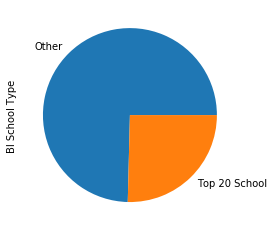

In [54]:
#df['BI School Type'].value_counts().plot(kind='bar')
df['BI School Type'].value_counts().plot(kind='pie')

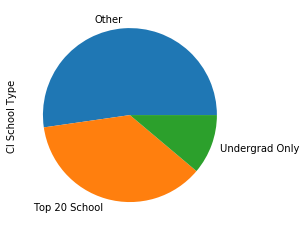

In [55]:
#df['CI School Type'].value_counts().plot(kind='bar')
df['CI School Type'].value_counts().plot(kind='pie')

In [31]:
df.sort_values(by='Baccalaureate Institution').head(10)

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status,BI School Type,CI School Type
1036,"Mikeska, Emily R",Abilene Christian University,Chemistry - Chemical Synthesis,University of Kansas,Honorable Mention,Other,Other
1617,"Velez, Caroline",Adelphi University,"Chemistry - Chemical Theory, Models and Comput...",University of Miami,Honorable Mention,Other,Other
749,"Jaynes, Kyle Egan",Adrian College,Life Sciences - Evolutionary Biology,Michigan State University,Honorable Mention,Other,Other
1126,"Nguyen, Quynh N",Agnes Scott College,"Chemistry - Macromolecular, Supramolecular, an...",Agnes Scott College,Honorable Mention,Other,Other
767,"Jordan, Indonesia Alohn",Alabama A&M University,Psychology - other (specify) - Behavioral Neur...,University of Alabama System,Honorable Mention,Other,Other
979,"Lampkin, Alexius KaDeshia",Albany State University,Life Sciences - other (specify) - Molecular an...,University of Wisconsin System,Awarded,Other,Top 20 School
194,"Bush, Jessica Anne",Albion College,Chemistry - Chemistry of Life Processes,The Scripps Research Institute,Honorable Mention,Other,Other
411,"Eberts, Elizabeth",Alfred University,Psychology - Cognitive Neuroscience,Temple University,Honorable Mention,Other,Other
1129,"Martinez Bocanegra, Jennifer Lynne",American University,Life Sciences - Cell Biology,University of Washington,Awarded,Other,Top 20 School
823,"Jean, Cheldina Fara",American University,Engineering - Environmental Engineering,American University,Awarded,Other,Other


In [50]:
df['Baccalaureate Institution'].sort_values(ascending=True).head(10)

1036    Abilene Christian University
1617              Adelphi University
749                   Adrian College
1126             Agnes Scott College
767           Alabama A&M University
979          Albany State University
194                   Albion College
411                Alfred University
1129             American University
823              American University
Name: Baccalaureate Institution, dtype: object

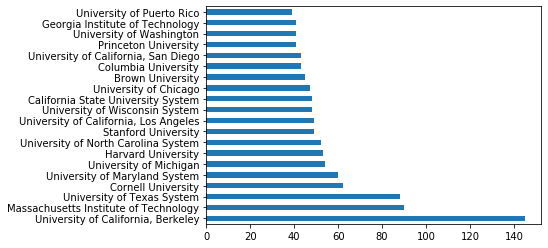

In [32]:
df['Baccalaureate Institution'].sort_values().value_counts(ascending=False)[:20].plot(kind='barh')

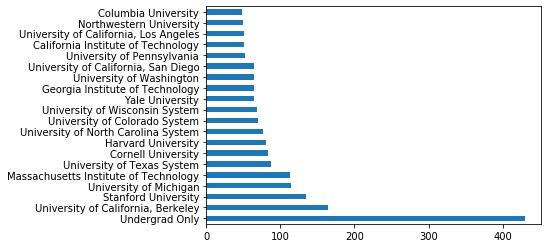

In [33]:
df['Current Institution'].sort_values().value_counts(ascending=False)[:20].plot(kind='barh')

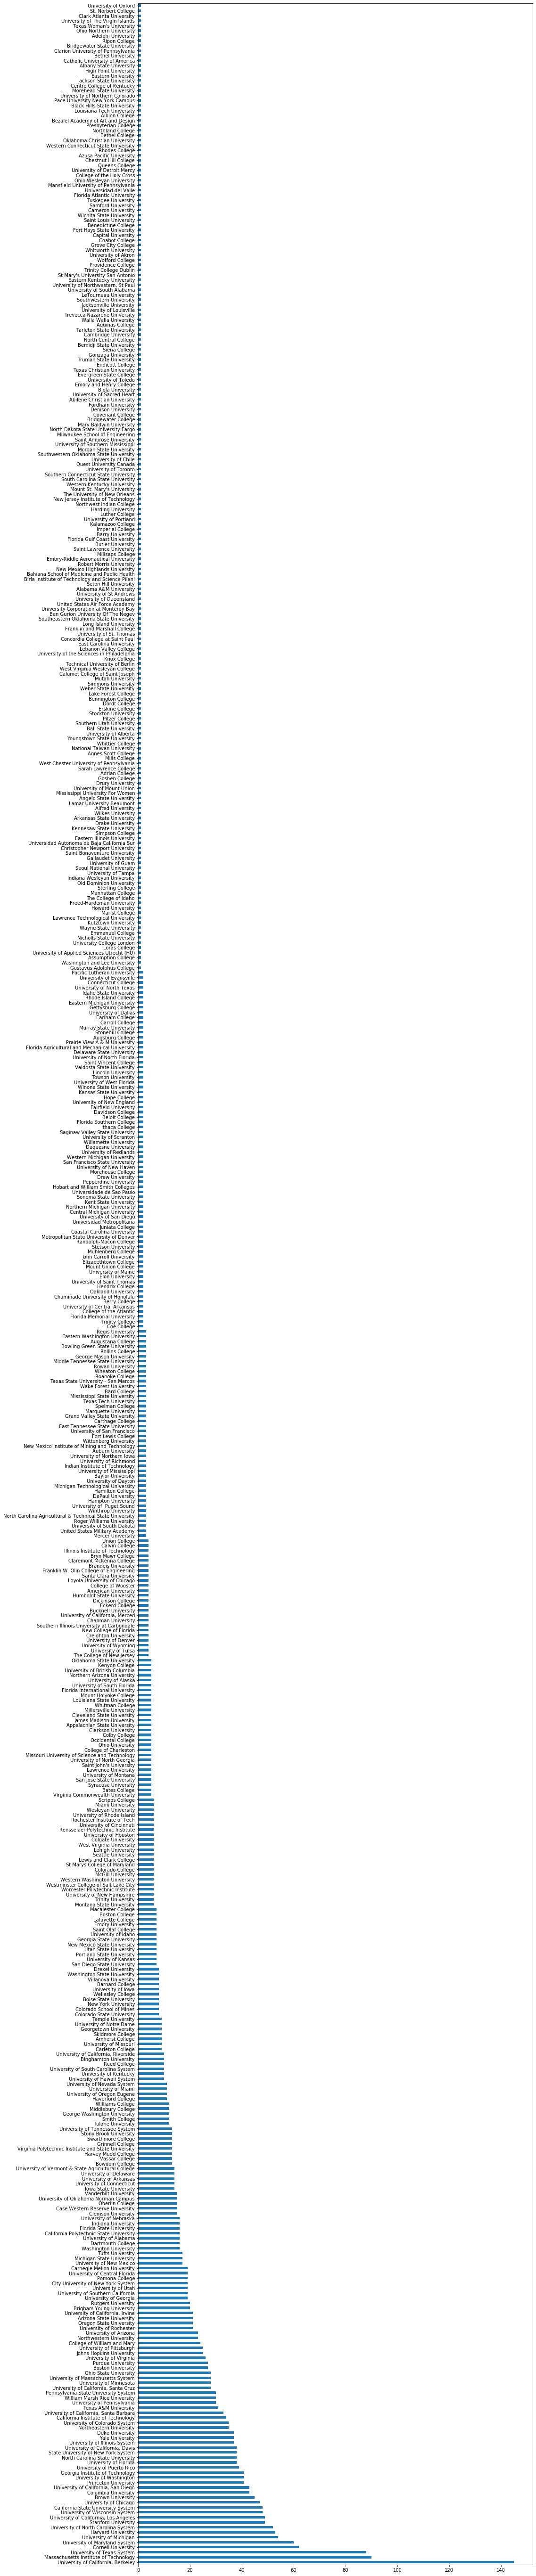

In [34]:
df['Baccalaureate Institution'].sort_values().value_counts().plot(kind='barh', figsize=(15,100), stacked=True)

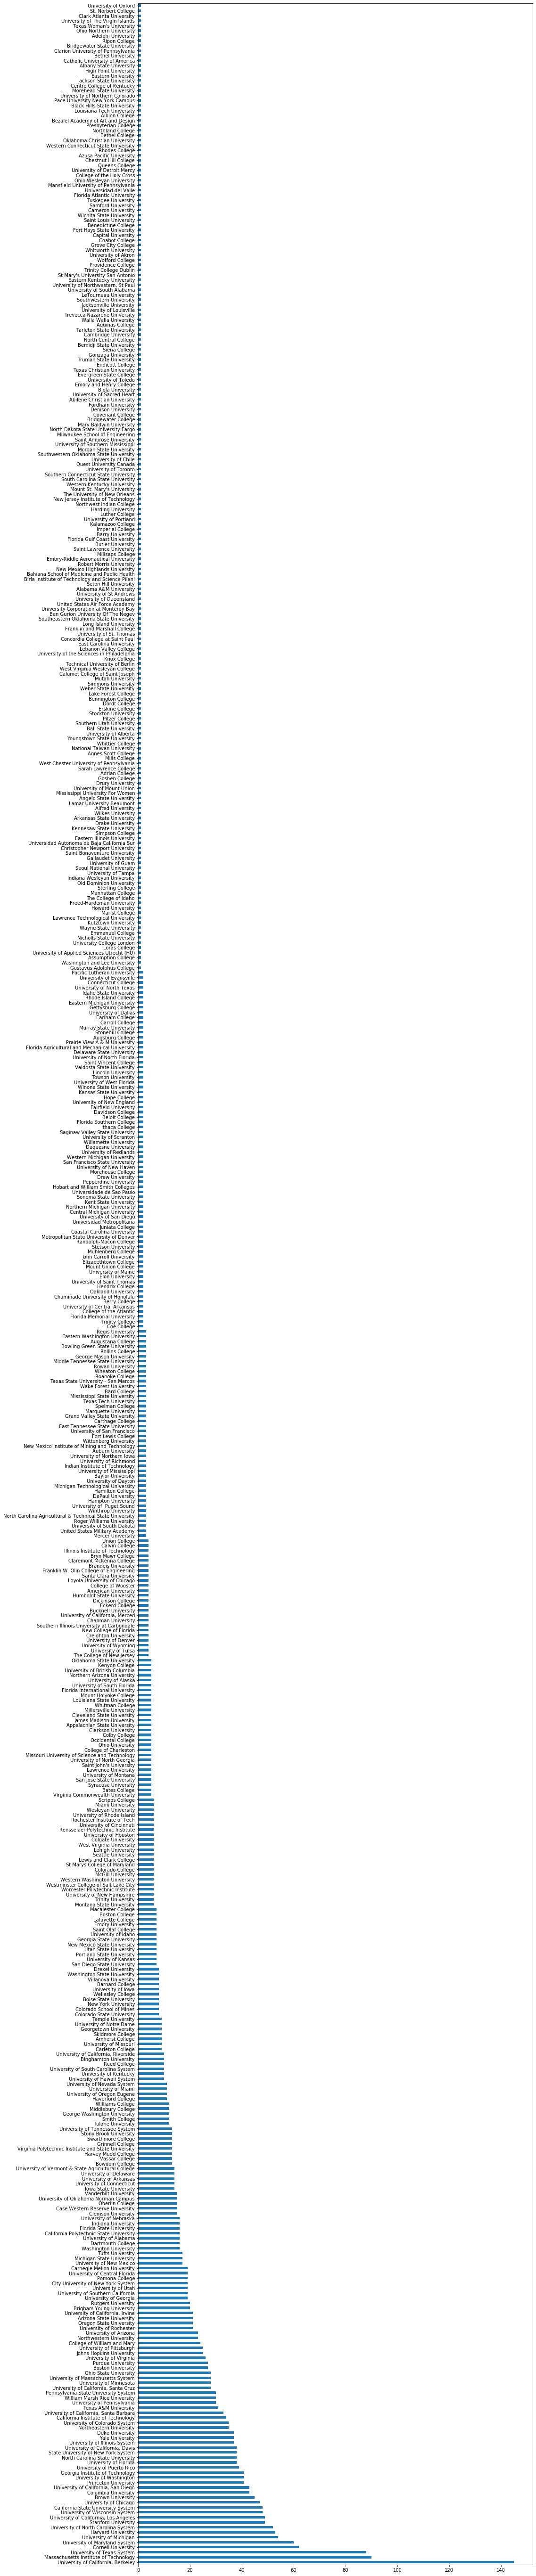

In [35]:
#from matplotlib.colors import ListedColormap
#cmap = ListedColormap(['#0343df', '#e50000', '#ffff14', '#929591'])
df['Baccalaureate Institution'].sort_values().value_counts().plot(kind='barh', figsize=(15,100), stacked=True)
#df['Current Institution'].sort_values(ascending=True).value_counts().plot(kind='barh', figsize=(15,100), stacked=True)

In [29]:
#df.groupby([df['Baccalaureate Institution'].sort_values().value_counts(ascending=False), df['Award Status']]).count()['BI School Type'].unstack().plot(kind='barh')
#.count()['BI School Type'].

In [30]:
?df.sort_values()

Object `df.sort_values()` not found.


In [51]:
df['Baccalaureate Institution'].value_counts().head(10)

University of California, Berkeley       145
Massachusetts Institute of Technology     90
University of Texas System                88
Cornell University                        62
University of Maryland System             60
University of Michigan                    54
Harvard University                        53
University of North Carolina System       52
University of California, Los Angeles     49
Stanford University                       49
Name: Baccalaureate Institution, dtype: int64

In [37]:
df.describe()

,Name,Baccalaureate Institution,Field of Study,Current Institution,Award Status,BI School Type,CI School Type
count,3863,3863,3863,3863,3863,3863,3863
unique,3863,514,295,304,2,2,3
top,"Kliewer, Emily Elizabeth","University of California, Berkeley",Life Sciences - Ecology,Undergrad Only,Awarded,Other,Other
freq,1,145,233,430,2076,2882,2019


In [ ]:
#BI_distribution = df.groupby(['Baccalaureate Institution'])
#BI_distribution.sort('count', descending=True).barh('Baccalaureate Institution')
#df['Current Institution'].value_counts(ascending=True).plot(kind='barh')
#BI_AwardStatus =  df.series.value_counts('Baccalaureate Institution', 'Award Status')
#BI_AwardStatus.group('Award Status').sort('count', descending=True).barh('Baccalaureate Institution')

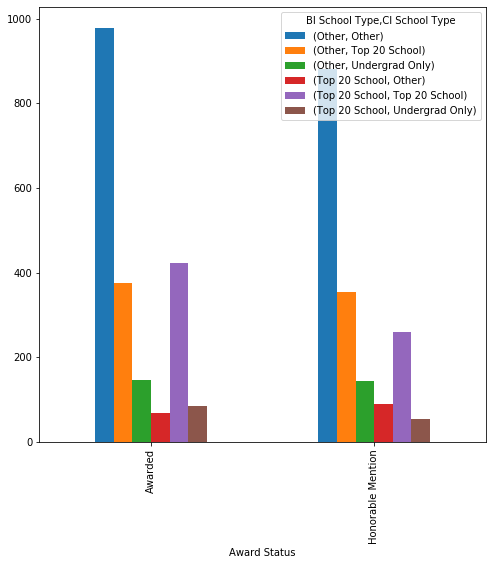

In [40]:
table = pd.crosstab(index=df['Award Status'], columns=[df['BI School Type'], df['CI School Type']])
table.plot(kind='bar', figsize=(8,8), stacked=False)

In [41]:
pd.crosstab(index=df['Award Status'], columns=df['BI School Type'])

BI School Type,Other,Top 20 School
Award Status,,
Awarded,1500,576
Honorable Mention,1382,405


In [42]:
pd.crosstab(index=df['Award Status'], columns=df['CI School Type'])

CI School Type,Other,Top 20 School,Undergrad Only
Award Status,,,
Awarded,1047,798,231
Honorable Mention,972,616,199


In [ ]:
fig,ax = plt.subplots(1,1)

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 4, 7, 6]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)

plt.xlim(0, 10)
plt.ylim(0, 0.4)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-Square Distribution')

plt.legend()
plt.show()

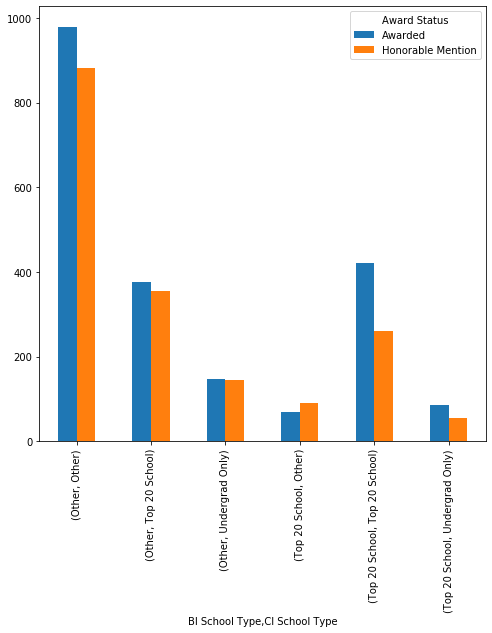

In [43]:
table1 = pd.crosstab([df['BI School Type'], df['CI School Type']], df['Award Status'])
table1.plot(kind='bar', figsize=(8,8), stacked=False, subplots=False, sharey=True)

In [44]:
#df.groupby(['Baccalaureate Institution', 'Award Status']).size().head(60)
df.groupby(['Baccalaureate Institution', 'Award Status']).size().head(60)

Baccalaureate Institution                         Award Status     
Abilene Christian University                      Honorable Mention     1
Adelphi University                                Honorable Mention     1
Adrian College                                    Honorable Mention     1
Agnes Scott College                               Honorable Mention     1
Alabama A&M University                            Honorable Mention     1
Albany State University                           Awarded               1
Albion College                                    Honorable Mention     1
Alfred University                                 Honorable Mention     1
American University                               Awarded               4
Amherst College                                   Awarded               5
                                                  Honorable Mention     4
Angelo State University                           Honorable Mention     1
Appalachian State University                

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002512FA06848>],
      dtype=object)

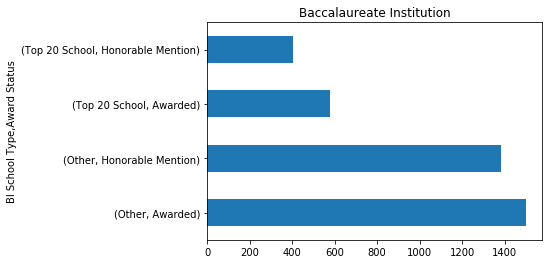

In [45]:
df.groupby(['BI School Type', 'Award Status']).count()['Baccalaureate Institution'].plot(kind='barh', subplots=True)

In [ ]:
df['Current Institution'].value_counts().head(60)

In [ ]:
#pd.crosstab(df['Baccalaureate Institution'], df['Current Institution'])

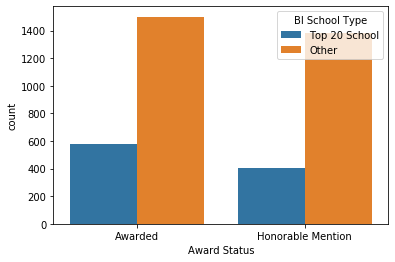

In [46]:
sns.countplot(df['Award Status'], hue = df['BI School Type'])

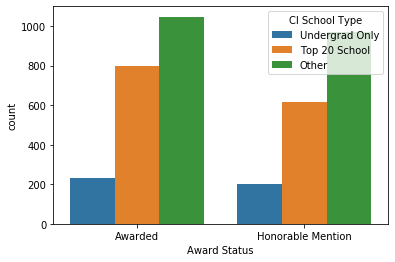

In [47]:
sns.countplot(df['Award Status'], hue = df['CI School Type'])

In [ ]:
#sns.catplot(x="BI School Type", y =df['Baccalaureate Institution'].value_counts(), hue = 'Award Status', kind='bar', data=df)

#sns.catplot(data=df, x='Award Status', kind='count', col='BI School Type', )
#plt.show()

In [ ]:
df.describe()

In [ ]:
#def categorical_summarized(df, x='BI School Type', hue='Award Status', verbose=True):
    #if x == None:
        #column_interested = y
    #else: 
        #column_interested = x
   # series = df['BI School Type']
    #print(series.describe())
    #print('mode: ', series.mode())
    #if verbose:
     #   print('='*80)
      #  print(series.value_counts())
    
#sns.countplot(x='BI School Type', hue = 'Award Status', data=df, stacked=False)
#plt.show()

In [ ]:
#sns.catplot(data=df, x='BI School Type', kind='count', col='Award Status', hue ='Award Status' )
#plt.show()

In [ ]:
#df.groupby(['BI School Type', 'Award Status'])['Award Status'].count().unstack(1).plot.bar(stacked=True)
#df.groupby(['Award Status', 'BI School Type'])['BI School Type'].count().unstack(1).plot.pie(subplots=True)

In [ ]:
sns.catplot(data=df, x='BI School Type', kind='count', col='CI School Type', hue ='Award Status' )
plt.show()

In [ ]:
#?mosaic

In [ ]:
#mosaic(df, ['Award Status', 'BI School Type', 'CI School Type'], title = "GRFP Awards", labelizer=None)
#prop = {}
#props[('Awarded', 'Top 20 School', 'Other')] = {'color': 'xkcd:orange'}
#props[('Awarded', 'Top 20 School', 'Top 20 School')] = {'color': 'xkcd:pale blue '}
#props[('Awarded', 'Other', 'Other')] = {'color': 'xkcd: yellow '}
#props[('Awarded', 'Other', 'Top 20 School')] = {'color': 'xkcd: purple '}
#props[('Honorable Mention', 'Top 20 School', 'Other')] = {'color': 'xkcd:orange', 'hatch':'/'}
#props[('Honorable Mention', 'Top 20 School', 'Top 20 School')] = {'color': 'xkcd: pale blue', 'hatch':'/'}
#props[('Honorable Mention', 'Other', 'Other')] = {'color': 'xkcd: yellow ', 'hatch':'/'}
#props[('Honorable Mention', 'Other', 'Top 20 School')] = {'color': 'xkcd: purple', 'hatch':'/'}

######props = lambda key: {'color': 'r' if 'Awarded' in key else 'gray'} 

#mosaic(df, ['Award Status', 'BI School Type', 'CI School Type'], title = "GRFP Awards")

In [ ]:
#df['BI School Type'].value_counts().plot(kind='bar', subplots = True)
#df['CI School Type'].value_counts().plot(kind='bar', subplots = True)

C:\Users\andyp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


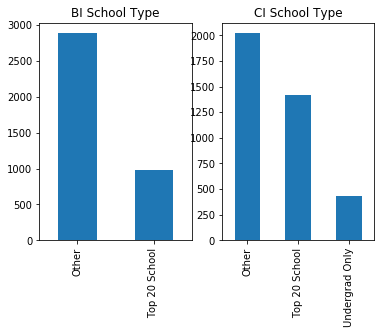

In [48]:
categorical_features = ["BI School Type", "CI School Type"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

In [49]:
group_by_top20BI = df.groupby(by=['BI School Type'])
BI_avg = group_by_top20BI.value_counts.mean()
BI_count = group_by_top20BI.value_counts.count()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [ ]:
#Only_Undergrad = ['Only Undergrad']
#df['CI School Type'] = np.where(df['Current Institution'].isin(Only_Undergrad, top_20_schools_CI), 'Only Undergrad', 'Top 20 School')

In [ ]:
#df[['Baccalaureate Institution', 'Current Institution', 'BI School Type', 'CI School Type']]

In [ ]:
#df['Award Status'].value_counts().plot(kind='pie')
#df['Award Status'].value_counts().plot(kind='bar')

In [ ]:
#g = df.groupby('Baccalaureate Institution')
#g